In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,Jan-99,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
#Preprocess the dataset like you did in Step 1, taking into account any modifications to optimize the model.

#For optimization, I removed the active statuses of 1 because the charities are not closed and may be successful in the future.
application_cleaned_df = application_df[application_df['STATUS'] == 0]

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'. Also drop status since it only has one value now
application_cleaned_df.drop(['EIN', 'NAME', 'STATUS'], axis=1, inplace = True)

# Convert categorical data to numeric with `pd.get_dummies`
app_dummies_df = pd.get_dummies(application_cleaned_df)
app_dummies_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T3,AFFILIATION_CompanySponsored,AFFILIATION_Independent,CLASSIFICATION_C1000,CLASSIFICATION_C2000,CLASSIFICATION_C2100,USE_CASE_CommunityServ,USE_CASE_Preservation,ORGANIZATION_Association,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_10000-24999,INCOME_AMT_25000-99999,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
2816,5000,1,1,1,0,0,1,0,1,0,0,1,1,0,0,1,0
2928,7287,1,1,0,1,1,0,0,0,1,0,1,0,0,1,0,1
10155,5000,1,1,0,1,1,0,0,0,1,0,1,0,1,0,1,0
20518,5000,0,1,1,0,0,0,1,1,0,1,0,1,0,0,1,0
29590,5000,0,1,0,1,1,0,0,0,1,1,0,1,0,0,1,0


In [3]:
# Split our preprocessed data into our features and target arrays
X = app_dummies_df.drop(['IS_SUCCESSFUL'], axis=1)
y = app_dummies_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [4]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
#Design a neural network model, taking into account any modifications that will optimize the model to achieve higher than 75% accuracy.

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
features = len(X_train_scaled[0])
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=20, activation="relu", input_dim=features))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=20, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                340       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
1/1 [==============================] - 0s 369ms/step - loss: 0.8841 - accuracy: 0.3333
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 0.8598 - accuracy: 0.3333
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 0.8371 - accuracy: 0.3333
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 0.8149 - accuracy: 0.3333
Epoch 5/50
1/1 [==============================] - 0s 2ms/step - loss: 0.7931 - accuracy: 0.3333
Epoch 6/50
1/1 [==============================] - 0s 999us/step - loss: 0.7729 - accuracy: 0.3333
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 0.7536 - accuracy: 0.3333
Epoch 8/50
1/1 [==============================] - 0s 999us/step - loss: 0.7348 - accuracy: 0.3333
Epoch 9/50
1/1 [==============================] - 0s 2ms/step - loss: 0.7164 - accuracy: 0.3333
Epoch 10/50
1/1 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.3333
Epoch 11/50
1/1 [================

Seeing the network quickly come to an accuracy of 1 brings the concern that we removed relevant data during cleanup. Initially, we had 43 features. When checking below, we see that by removing the open charities we are down to 16. This is because charity categorizations utilized haven't been used in a closed scenario. Recreating and running again below.

In [8]:
features

16

In [9]:
#REDO CLEANUP

#This time for optimization, I did not remove any charities based on open status. Instead, I removed the classification identifiers since it is an arbitrary categorization.
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_cleaned_df = application_df.drop(['EIN', 'NAME', 'CLASSIFICATION'], axis=1)

# Convert categorical data to numeric with `pd.get_dummies`
app_dummies_df = pd.get_dummies(application_cleaned_df)
app_dummies_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,5000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [10]:
# Split our preprocessed data into our features and target arrays
X = app_dummies_df.drop(['IS_SUCCESSFUL'], axis=1)
y = app_dummies_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
#verify that we didn't clear too many features this time
features = len(X_train_scaled[0])
features

45

NOTE: Rather than losing 2/3 of the features after splitting the data, we now have 2 additional features. This means our model will have more data to work with. This is also because we did not remove the lower values and the unused charities. 

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=features))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=100, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4600      
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 14,801
Trainable params: 14,801
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 792us/step - loss: 0.5787 - accuracy: 0.7209
Epoch 2/50
804/804 [==============================] - 1s 780us/step - loss: 0.5706 - accuracy: 0.7273
Epoch 3/50
804/804 [==============================] - 1s 778us/step - loss: 0.5686 - accuracy: 0.7265
Epoch 4/50
804/804 [==============================] - 1s 776us/step - loss: 0.5666 - accuracy: 0.7280
Epoch 5/50
804/804 [==============================] - 1s 777us/step - loss: 0.5656 - accuracy: 0.7289
Epoch 6/50
804/804 [==============================] - 1s 788us/step - loss: 0.5651 - accuracy: 0.7294
Epoch 7/50
804/804 [==============================] - 1s 773us/step - loss: 0.5645 - accuracy: 0.7298
Epoch 8/50
804/804 [==============================] - 1s 780us/step - loss: 0.5640 - accuracy: 0.7288
Epoch 9/50
804/804 [==============================] - 1s 768us/step - loss: 0.5640 - accuracy: 0.7291
Epoch 10/50
804/804 [==============================] - 1s 768us/step - loss: 0.563

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5786 - accuracy: 0.7188 - 240ms/epoch - 894us/step
Loss: 0.578606367111206, Accuracy: 0.7188338041305542


We are fairly close to our accuracy goal of 75%. For this third attempt, we will also perform the cleanup done on the fringe and zero values that was done prior, now that we have identified relevant columns.

In [18]:
#REDO CLEANUP TAKE 2

#This time for optimization, I did not remove any charities based on open status. Instead, I removed the classification identifiers since it is an arbitrary categorization.
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_cleaned_df = application_df.drop(['EIN', 'NAME', 'CLASSIFICATION'], axis=1)

In [20]:
# Choose a cutoff value and create a list of application types to be replaced

# Look at APPLICATION_TYPE value counts for binning
app_bins = application_df['APPLICATION_TYPE'].value_counts()

# use the variable name `application_types_to_replace`
application_types_to_replace = app_bins.loc[app_bins < 500].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    application_cleaned_df['APPLICATION_TYPE'] = application_cleaned_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_cleaned_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [21]:
# Look at CLASSIFICATION value counts for binning
class_bins = application_df['CLASSIFICATION'].value_counts()

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = class_bins.loc[class_bins < 1000].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [23]:
# Convert categorical data to numeric with `pd.get_dummies`
app_dummies_df = pd.get_dummies(application_cleaned_df)
app_dummies_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,INCOME_AMT_Jan-99,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [24]:
# Split our preprocessed data into our features and target arrays
X = app_dummies_df.drop(['IS_SUCCESSFUL'], axis=1)
y = app_dummies_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [25]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
#verify that we didn't clear too many features this time
features = len(X_train_scaled[0])
features

37

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=100, activation="relu", input_dim=features))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=100, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               3800      
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 14,001
Trainable params: 14,001
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 1s 817us/step - loss: 0.5838 - accuracy: 0.7169
Epoch 2/50
804/804 [==============================] - 1s 802us/step - loss: 0.5736 - accuracy: 0.7248
Epoch 3/50
804/804 [==============================] - 1s 792us/step - loss: 0.5720 - accuracy: 0.7231
Epoch 4/50
804/804 [==============================] - 1s 792us/step - loss: 0.5701 - accuracy: 0.7236
Epoch 5/50
804/804 [==============================] - 1s 788us/step - loss: 0.5687 - accuracy: 0.7257
Epoch 6/50
804/804 [==============================] - 1s 791us/step - loss: 0.5684 - accuracy: 0.7248
Epoch 7/50
804/804 [==============================] - 1s 822us/step - loss: 0.5675 - accuracy: 0.7246
Epoch 8/50
804/804 [==============================] - 1s 796us/step - loss: 0.5672 - accuracy: 0.7258
Epoch 9/50
804/804 [==============================] - 1s 806us/step - loss: 0.5672 - accuracy: 0.7258
Epoch 10/50
804/804 [==============================] - 1s 802us/step - loss: 0.566

In [31]:
# Train the model again with more epochs to see if we can reach 75% goal
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 817us/step - loss: 0.5610 - accuracy: 0.7287
Epoch 2/100
804/804 [==============================] - 1s 803us/step - loss: 0.5612 - accuracy: 0.7291
Epoch 3/100
804/804 [==============================] - 1s 786us/step - loss: 0.5610 - accuracy: 0.7282
Epoch 4/100
804/804 [==============================] - 1s 788us/step - loss: 0.5606 - accuracy: 0.7291
Epoch 5/100
804/804 [==============================] - 1s 786us/step - loss: 0.5605 - accuracy: 0.7293
Epoch 6/100
804/804 [==============================] - 1s 797us/step - loss: 0.5610 - accuracy: 0.7289
Epoch 7/100
804/804 [==============================] - 1s 801us/step - loss: 0.5615 - accuracy: 0.7285
Epoch 8/100
804/804 [==============================] - 1s 808us/step - loss: 0.5604 - accuracy: 0.7288
Epoch 9/100
804/804 [==============================] - 1s 816us/step - loss: 0.5611 - accuracy: 0.7277
Epoch 10/100
804/804 [==============================] - 1s 832us/step - l

804/804 [==============================] - 1s 802us/step - loss: 0.5587 - accuracy: 0.7298
Epoch 80/100
804/804 [==============================] - 1s 796us/step - loss: 0.5586 - accuracy: 0.7298
Epoch 81/100
804/804 [==============================] - 1s 811us/step - loss: 0.5589 - accuracy: 0.7292
Epoch 82/100
804/804 [==============================] - 1s 808us/step - loss: 0.5587 - accuracy: 0.7300
Epoch 83/100
804/804 [==============================] - 1s 808us/step - loss: 0.5589 - accuracy: 0.7299
Epoch 84/100
804/804 [==============================] - 1s 817us/step - loss: 0.5592 - accuracy: 0.7298
Epoch 85/100
804/804 [==============================] - 1s 815us/step - loss: 0.5587 - accuracy: 0.7297
Epoch 86/100
804/804 [==============================] - 1s 808us/step - loss: 0.5588 - accuracy: 0.7300
Epoch 87/100
804/804 [==============================] - 1s 797us/step - loss: 0.5588 - accuracy: 0.7299
Epoch 88/100
804/804 [==============================] - 1s 792us/step - loss:

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5897 - accuracy: 0.7266 - 150ms/epoch - 560us/step
Loss: 0.5896536707878113, Accuracy: 0.7266472578048706


After corrections, we still only improved by just under 2% from our pre-optimized model.

In [33]:
#Save and export your results to an HDF5 file
nn_model.save("AlphabetSoupCharity_Optimization.h5")

<AxesSubplot:>

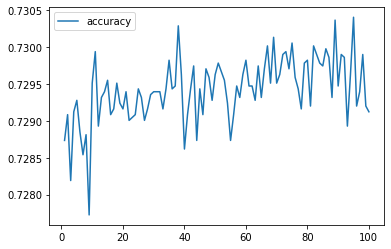

In [34]:
#visualization for report
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")